## AASF + DSC IIITM Gwalior Presents 'Intro to Deep Learning & Kaggle' Session.

### Hi !
#### Welcome! This notebook is for the contest organized with the above session.

### Instructions: 

1. Clone this Github repo to run this notebook.

2. Run this notebook. You CAN use any platform ie **Kaggle, Colab etc...** to run the notebook.

3.  The notebook is well documented with all the necessay instructions provided in between. Kindly carefully read those instructions.   


**ANY SUBMISSION VIOLATING THE INSTRUCTIONS IS SUBJECT TO DISQUALIFICATION.**

#### 4. ALL THE SUBMISSIONS WILL BE JUDGED FOR THEIR ACCURACY, CODE QUALITY etc. THE DECISION OF THE JUDGES SHALL BE FINAL & ABIDING ON ALL THE PARTICIPANTS.


## CONTENTS ::

[ **1 ) Importing Various Modules**](#content1)

[ **2 ) Preparing the Data**](#content2)

[ **3 ) Modelling**](#content3)

[ **4 ) Evaluating the Model Performance**](#content4)

<a id="content1"></a>
## 1 ) Importing Various Modules.

#### The following cell is for importing the various modules required for coding. 

#### Some initial modules are loaded for you. If you require any other module, go ahead and import it !!!

In [67]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator

# keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# miscellaneous packages
import cv2   
from tqdm import tqdm
import os
import random as rn
from random import shuffle
from zipfile import ZipFile
from PIL import Image

<a id="content2"></a>
## 2 ) Preparing the Data

#### In this section, you will write the code to read and prepare the data. The dataset used for this contest is the [Flowers Recognition Dataset](https://www.kaggle.com/alxmamaev/flowers-recognition) on Kaggle.

## 2.1) The Image Size.

#### In the cell below, the image size to be used is specified.

### For a fair judegment all the submissions need to use the same image size. Therefore, for this contest, the image size is fixed to 128.

### Any submission that uses an image size other than 128 is subject to disqualification.

In [68]:
IMG_SIZE=128

## 2.2) Reading the data.

#### In the following cell, provide the paths to the individual flower directories within the dataset.

#### Currently the paths are according to the naming on Kaggle. So if you import the data in a noteboook on Kaggle or run this notebook on Kaggle and import the [dataset](https://www.kaggle.com/alxmamaev/flowers-recognition), the cell should work absolutely fine !!!

#### If you are training on some other platform, like Google Colab or any other , specify the corresponding paths.

In [69]:
FLOWER_DAISY_DIR='../input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers-recognition/flowers/rose'


## 2.3) Reading the images and extracting the labels

#### The cell below creates 2 lists, one for the images and one for the labels. These lists will later be populated to hold the images and the corresponding labels.

In [70]:
X=[] # This array will hold all the images.

Y=[] # This list shall hold the labels for all the images.

#### The cell below has a function to read the data. Complete the function so that it correctly reads the images.

In [71]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=flower_type  # Assigning the label to this sample.
        path = os.path.join(DIR,img) # The path to the image.
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":# Just checking the file extension to be '.jpeg'
            
           #---------------------------------- X -----------------------------------#
           # Given the path to an image, read the image using OpenCV and resize it to have shape (128,128,3).
            
            img = cv2.imread(path)
            img = cv2.resize(img,(128,128))
           #---------------------------------- X ------------------------------------#
            
            # Append the image and the label to the respective lists.
            X.append(np.array(img)) 
            Y.append(str(label))        

#### In the following lines of code, the above function has been called with appropriate parameters for each flower type.

#### Once you have completed the above function, just run these cells to read and prepare the data. !!!

In [72]:
make_train_data('Daisy',FLOWER_DAISY_DIR)

100%|██████████| 769/769 [00:02<00:00, 329.53it/s]


In [73]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)


100%|██████████| 734/734 [00:02<00:00, 283.41it/s]


In [74]:
make_train_data('Tulip',FLOWER_TULIP_DIR)

100%|██████████| 984/984 [00:03<00:00, 290.84it/s]


In [75]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)

100%|██████████| 1055/1055 [00:03<00:00, 319.81it/s]


In [76]:
make_train_data('Rose',FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:02<00:00, 335.73it/s]


In [77]:
print("The number of images is: ",len(X))
print("The number of labels is: ",len(Y))

The number of images is:  4323
The number of labels is:  4323


## 2.2 ) One Hot Encoding the Labels.

#### If you had been following since, you know that we have got a list named 'Y' that holds the labels.

#### In the following cell, write the code to One Hot encode the labels.

### Note that the variable name of the One Hot Encoded labels should still be 'Y'. to proceed. Else you may have to change some portion of the code to follow.

In [78]:
#---------------------------------- X -----------------------------------#
# Given the set of labels Y, write code to One Hot Encode it. 
# Store the one hot encoded labels in variable named 'Y' only.
            

# Write your code here.

# First we use label encoding to convert string categories to numbers
# Then convert numbers to binary
le = LabelEncoder()
Y = le.fit_transform(Y)

# to_categorical where total classes = 5
Y = to_categorical(Y,5)

#---------------------------------- X ------------------------------------#

## 2.3) Normalize the images.

#### In the next cell, write code to normalize the images. If you had followed along, you know that we have a list 'X' that holds the images. Write code to normalize the images in the list.

In [79]:
#---------------------------------- X -----------------------------------#
# Given the images  in the list 'X', normalize them. Store the normalized images in variable named 'X' only.

X=np.array(X)
X= X/255
# Normalizing pixels between 0 and 1.

#---------------------------------- X ------------------------------------#

## 2.4) Splitting into Training and Validation Sets

#### Now we have the normalized images in 'X' and the corresponding labels in 'Y'. 

#### Use scikit learn [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create train and validation sets.

### Again, to be consistent across all the submissions, all the submissions have to use the same test size and random state. 

### Use test_size=0.25 and random state=42.


In [80]:
#---------------------------------- X -----------------------------------#
# Given 'X' ie the images and 'Y' ie the labels, create the train and the validation sets. 

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=42)

# Setting a Random seed value (42)
np.random.seed(42)
rn.seed(42)

#---------------------------------- X ------------------------------------#

<a id="content3"></a>
## 3 ) Modeling

#### In this section, you will actually build the model. 

### A sample model has been provided in the cell below to start but note that all the submissions ARE free to experiment with the model architecture. 

### You can freely play with the hyper-paramters such as **learning rate, etc..** and with other parameters such as the batch size, epochs, activation functions and others.

## 3.1 ) Building the ConvNet Model

In [81]:
# A Sample CNN model.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

#---------------------------------- X -----------------------------------#
 
# Write your code here. You can add/remove the layers as u wish.
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#---------------------------------- X ------------------------------------#

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

## 3.2 ) The Batch size and the no. of Epochs.

In [82]:
# ------------ You can freely experiment with these parameters-----------------
batch_size=128
epochs=50

## 3.3 ) Data Augmentation

#### If you understand the contents of the cell below, go ahead  and experiment with it !!!!

#### Else just leave it as it is.

In [83]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

## 3.4 ) Compiling the Keras Model & Summary

### You are free to use a different optimizer and different loss function and metrics.

In [84]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 96)        55392     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)      

## 3.5 ) Fitting on the Training set and making predcitons on the Validation set

### Don't change anything in this cell. The cell should work fine!!!

In [86]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
25/25 [==============================] - 14s 580ms/step - loss: 1.4577 - accuracy: 0.3154 - val_loss: 1.2298 - val_accuracy: 0.4524
Epoch 2/50
25/25 [==============================] - 14s 566ms/step - loss: 1.2157 - accuracy: 0.4836 - val_loss: 1.1301 - val_accuracy: 0.5486
Epoch 3/50
25/25 [==============================] - 14s 551ms/step - loss: 1.1078 - accuracy: 0.5398 - val_loss: 0.9866 - val_accuracy: 0.6087
Epoch 4/50
25/25 [==============================] - 13s 533ms/step - loss: 1.0162 - accuracy: 0.5938 - val_loss: 0.8590 - val_accuracy: 0.6346
Epoch 5/50
25/25 [==============================] - 13s 537ms/step - loss: 0.9711 - accuracy: 0.6156 - val_loss: 0.8990 - val_accuracy: 0.6438
Epoch 6/50
25/25 [==============================] - 15s 620ms/step - loss: 0.9726 - accuracy: 0.6140 - val_loss: 0.9187 - val_accuracy: 0.6346
Epoch 7/50
25/25 [==============================] - 13s 527ms/step - loss: 0.8989 - accuracy: 0.6477 - val_loss: 0.8496 - val_accuracy: 0.6688

<a id="content4"></a>
## 4 ) Evaluating the Model Performance

#### This section is to evaluate the model that you have build. 

### Just run the following two cells that plot the 'Model Loss vs Epochs' and the 'Model Accuracy vs Epochs'.

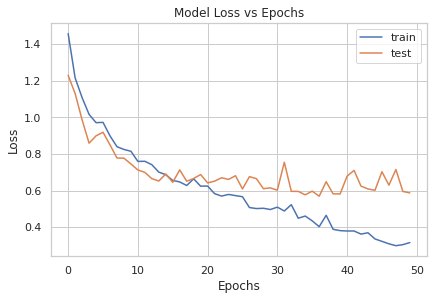

In [87]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

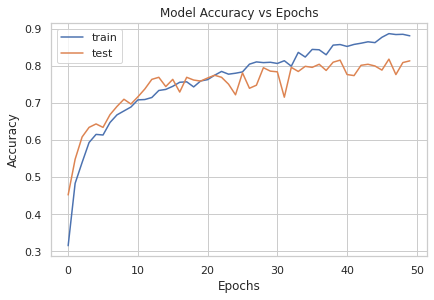

In [88]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


#  THE END.